In [1]:
!pip3 install mcerp
import numpy as np
import scipy
import mcerp
import matplotlib.pyplot as plt

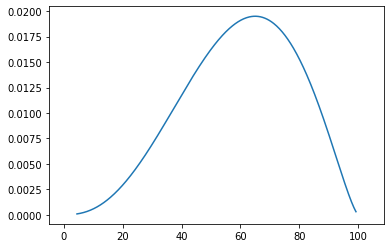

In [2]:
NORMALIZATION_SERVER = 200
NORMALIZATION_COOLING = 20000
#ROOM_TEMPERATURE = 24

min_load = 0
max_load = 100
expected_mean = 60

# https://en.wikipedia.org/wiki/PERT_distribution
# <b> is the load min
b = (6 * expected_mean - min_load - max_load) / 4
xv = mcerp.PERT(min_load, b, max_load)
xv.plot()

In [3]:
from mcerp.lhd import lhd

random_values = lhd(dist=xv.rv, size=48)
#random_values = [34, 14, 46, 9, 23, 6, 12, 17, 8, 30, 38, 16, 19, 8, 50, 27, 18, 11, 6, 11, 21, 41, 5, 14, 23, 15, 25, 31, 28, 35, 1, 55, 9, 3, 25, 19, 32, 2, 13, 5, 3, 39, 12, 61, 7, 21, 4, 1]
print(random_values.tolist())
print("mean with raw values: %s" % np.mean(random_values))
rounded_random_values = [np.around(x) for x in random_values]
print("mean with rounded values: %s" % np.mean(rounded_random_values))
random_values = rounded_random_values

[[91.88449677011498], [70.74391285918021], [13.82249617295006], [67.43881683234333], [65.18173690797072], [83.96977267773585], [53.491256101604], [69.24612515127599], [76.11667828766758], [78.49226473237137], [81.8054451693216], [37.36979112804506], [45.651716285267256], [63.57276270729591], [74.5795126443535], [24.868468239021492], [48.754876406355095], [56.6165057031718], [45.23850193587086], [73.64853529054493], [50.30236797856834], [59.06131480581568], [32.1694382170955], [85.19261920430526], [47.76147705126459], [82.06251767534272], [62.1194313882418], [77.53423049666466], [72.77003181233528], [58.428732873051125], [43.04962670767184], [55.48187335297282], [42.28060121050068], [26.96006103821351], [93.07578638822862], [35.93928234160552], [33.568190687443064], [62.56033272083946], [51.40325185961966], [53.23969931434011], [57.6748738651587], [71.6538430299294], [65.59480430478524], [60.20433119228406], [87.57680885632324], [40.47795975626874], [80.53378192847464], [67.652489276772

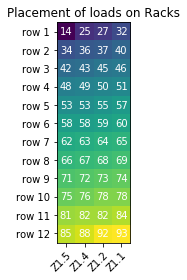

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

rows = ["row %s" % x for x in range(1,13)]
racks = ["Z1.5", "Z1.4", "Z1.2", "Z1.1"]

def compute_low_top_placement(loads):
    sorted_loads = sorted(loads)
    result = np.array(sorted_loads).reshape(12,4)
    return result

def compute_low_down_placement(loads):
    sorted_loads = sorted(loads, reverse=True)
    result = np.array(sorted_loads).reshape(12,4)
    return result

def compute_high_center_placement(loads):
    sorted_loads = [x.item() for x in sorted(loads)]
    placement_idx = [
        [0, 1, 2, 3], #1
        [4, 28, 29, 5], #2
        [6, 32, 33, 7], #3
        [8, 36, 37, 9], #4
        [10, 40, 41, 11], #5
        [12, 44, 45, 13], #6
        [14, 46, 47, 15], #7
        [16, 42, 43, 17], #8
        [18, 38, 39, 19], #9
        [20, 34, 35, 21], #10
        [22, 30, 31, 23], #11
        [24, 25, 26, 27], #12
    ]
    
    placement = [ [sorted_loads[idx] for idx in row] for row in placement_idx ] 
    result = np.array(placement)
    return result

placement = compute_low_top_placement(random_values)
#placement = compute_low_down_placement(random_values)
#placement = compute_high_center_placement(random_values)


fig, ax = plt.subplots()
im = ax.imshow(placement)

# We want to show all ticks...
ax.set_xticks(np.arange(len(racks)))
ax.set_yticks(np.arange(len(rows)))
# ... and label them with the respective list entries
ax.set_xticklabels(racks)
ax.set_yticklabels(rows)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(rows)):
    for j in range(len(racks)):
        text = ax.text(j, i, int(placement[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Placement of loads on Racks")
fig.tight_layout()
plt.show()

[[14. 34. 42. 48. 53. 58. 62. 66. 71. 75. 81. 85. 25. 36. 43. 49. 53. 58.
  63. 67. 72. 76. 82. 88. 27. 37. 45. 50. 55. 59. 64. 68. 73. 78. 82. 92.
  32. 40. 46. 51. 57. 60. 65. 69. 74. 78. 84. 93.]]


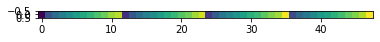

In [5]:
fig, ax = plt.subplots()

flat_placement = np.reshape(placement, (1, 48), order='F')
print(flat_placement)
im = ax.imshow(flat_placement)

plt.show()

[[124.37023766 150.33394342 155.10030533 157.89683133 159.92338714
  161.77015697 163.15867164 164.49144445 166.10186175 167.35877121
  169.20894076 170.42622941 142.32242085 151.67598802 155.60207237
  158.32025117 159.92338714 161.77015697 163.49640993 164.81781871
  166.41830153 167.66967931 169.51425707 171.33324007 144.45477057
  152.30436653 156.55941857 158.73389343 160.67981858 162.12354468
  163.83095778 165.14187619 166.73318831 168.28819898 169.51425707
  172.53666568 148.86184886 154.0439953  157.01733388 159.1385098
  161.4120098  162.47253884 164.16256048 165.46379502 167.04664146
  168.28819898 170.12284981 172.83667008]]
161.14109735278691


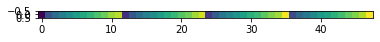

In [6]:
import math

def load_to_power_consumption(load):
    #power_consumption = 99.2314747103 + 2.05275371*load - 0.01289649*load*load
    power_consumption = 1.45331636e+02 + load * 2.96239188e-01 - 7.69497994e+01 * np.exp(-1 * 7.99954988e-02 * load)
    return power_consumption
    
power_consumptions = [load_to_power_consumption(x) for x in placement]
fig, ax = plt.subplots()

flat_power_consumptions = np.reshape(power_consumptions, (1, 48), order='F')
print(flat_power_consumptions)
print(np.mean(flat_power_consumptions))
im = ax.imshow(flat_placement)

plt.show()

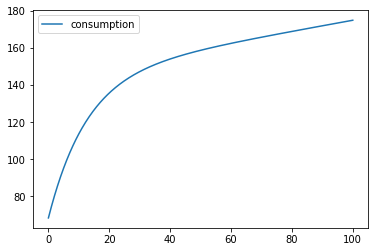

In [7]:
x = np.linspace(0, 100, 500)
y = load_to_power_consumption(x)

fig, ax = plt.subplots()

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, y, label='consumption')

ax.legend()
plt.show()

In [8]:
normalized_flat_power_consumption = [x / NORMALIZATION_SERVER for x in flat_power_consumptions]
print(normalized_flat_power_consumption)

[array([0.62185119, 0.75166972, 0.77550153, 0.78948416, 0.79961694,
       0.80885078, 0.81579336, 0.82245722, 0.83050931, 0.83679386,
       0.8460447 , 0.85213115, 0.7116121 , 0.75837994, 0.77801036,
       0.79160126, 0.79961694, 0.80885078, 0.81748205, 0.82408909,
       0.83209151, 0.8383484 , 0.84757129, 0.8566662 , 0.72227385,
       0.76152183, 0.78279709, 0.79366947, 0.80339909, 0.81061772,
       0.81915479, 0.82570938, 0.83366594, 0.84144099, 0.84757129,
       0.86268333, 0.74430924, 0.77021998, 0.78508667, 0.79569255,
       0.80706005, 0.81236269, 0.8208128 , 0.82731898, 0.83523321,
       0.84144099, 0.85061425, 0.86418335])]


In [9]:
from keras.models import load_model

# returns a compiled model
# identical to the previous one
#oracle = load_model('/Users/jonathan/seduceml3.h5')
#oracle = load_model('/Users/jonathan/Documents/workspace/seduce_ml/data/seduceml_2019_06_17_T_11_28_30.h5')
#oracle = load_model('/Users/jonathan/Documents/workspace/seduce_ml/data/seduceml_2019_06_20_T_00_04_32.h5')

#oracle = load_model('/Users/jonathan/Documents/workspace/seduce_ml/data/seduceml_2019_06_26_T_15_03_29.h5')
#oracle = load_model('/Users/jonathan/Documents/workspace/seduce_ml/data/seduceml_2019_06_27_T_15_53_30.h5')

#oracle = load_model('/Users/jonathan/Documents/workspace/seduce_ml/data/seduceml_2019_07_02_T_10_57_43.h5')
#oracle = load_model('/Users/jonathan/Documents/workspace/seduce_ml/data/seduceml_2019_07_02_T_13_48_13.h5')
#oracle = load_model('/Users/jonathan/Documents/workspace/seduce_ml/data/seduceml_2019_07_04_T_10_05_15.h5')

#oracle = load_model('/Users/jonathan/Documents/workspace/seduce_ml/data/seduceml_2019_07_05_T_19_36_30.h5')
oracle = load_model('../data/seduceml_2019_07_14_T_12_07_51.h5')

Using TensorFlow backend.
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
def prepare_load_array(load_array, temperature):
    return np.array([load_array[0]])

def compute_oracle_based_placement(loads, oracle):
    free_positions = range(0, 48)
    sorted_loads = [x.item() for x in sorted(loads, reverse=True)]
    
    #return sorted_loads
    
    mean_load = np.mean(sorted_loads)
    adjusted_mean_load = mean_load * 48 / 47

    #result = [0.0 for x in range(0, 48)]
    
    result = [adjusted_mean_load for x in range(0, 48)]
    for load in sorted_loads:
        current_best_score = 100
        current_best_free_position = -1
        for free_position in free_positions:
            temp_result = result[:]
            temp_result[free_position] = load
            
            # Do computation
            power_consumptions = [load_to_power_consumption(x) for x in temp_result]
            normalized_power_consumptions = [x / NORMALIZATION_SERVER for x in power_consumptions]
            
            #current_score = oracle.predict([normalized_flat_power_consumption])[0][0]
            proposed_loads = [np.array(normalized_power_consumptions)]
            proposed_loads_with_temperature = add_temperature_to_load_array(proposed_loads, ROOM_TEMPERATURE)
            
            current_score = np.max(oracle.predict(proposed_loads_with_temperature))
            
            if current_best_free_position == -1 or current_score < current_best_score:
                current_best_score = current_score
                current_best_free_position = free_position
        
        # Use the best result
        free_positions = [x for x in free_positions if x != current_best_free_position]
        result[current_best_free_position] = load
    
    
    print(current_best_score)
    placement = np.reshape(result, (12,4), order="F")
    
    return placement

normalized_flat_power_consumption_with_temp = prepare_load_array(normalized_flat_power_consumption, ROOM_TEMPERATURE)
print("mean: %s" % np.mean(oracle.predict(normalized_flat_power_consumption_with_temp)))
print("std: %s" % np.std(oracle.predict(normalized_flat_power_consumption_with_temp)))
print("vs")
oracle_based_placement = np.array(compute_oracle_based_placement(random_values, oracle)).reshape(12, 4)

oracle_power_consumptions = [load_to_power_consumption(x) for x in oracle_based_placement]
oracle_power_consumptions = np.reshape(oracle_power_consumptions, (1, 48), order='F')

normalized_oracle_power_consumptions = [x / NORMALIZATION_SERVER for x in oracle_power_consumptions]
normalized_oracle_power_consumptions = prepare_load_array(normalized_oracle_power_consumptions, 12)

print(normalized_flat_power_consumption_with_temp)
print(normalized_oracle_power_consumptions)

print("mean: %s" % np.mean(oracle.predict(normalized_oracle_power_consumptions)))
print("std: %s" % np.std(oracle.predict(normalized_oracle_power_consumptions)))

NameError: name 'ROOM_TEMPERATURE' is not defined

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(oracle_based_placement)

# We want to show all ticks...
ax.set_xticks(np.arange(len(racks)))
ax.set_yticks(np.arange(len(rows)))
# ... and label them with the respective list entries
ax.set_xticklabels(racks)
ax.set_yticklabels(rows)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(rows)):
    for j in range(len(racks)):
        text = ax.text(j, i, int(oracle_based_placement[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Placement of loads on Racks")
fig.tight_layout()
plt.show()

In [ ]:
print(oracle_based_placement)
optimised_placement = oracle_based_placement.reshape((1, 48), order="F")
print(optimised_placement)

In [ ]:
print([int(x) for x in flat_placement[0]])
print([int(x) for x in optimised_placement[0]])